This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

2023-12-31 18:41:15.095955: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-31 18:41:15.096035: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-31 18:41:15.166244: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-31 18:41:15.320831: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-31 18:41:16.653298: W tensorflow/compiler/tf2

In [3]:
import sys
sys.executable

'/bin/python3.11'

In [2]:
print(train_data.shape)
print(train_data[0])

(25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [3]:
print(train_labels.shape)
train_labels[0]

(25000,)


1

In [4]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(len(reverse_word_index))


88584


### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [9]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
print(x_train.shape)
print(x_train[0])

(25000, 10000)
[0. 1. 1. ... 0. 0. 0.]


In [8]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

2023-12-31 18:35:22.197703: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-31 18:35:23.330948: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-31 18:35:23.331308: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-31 18:35:23.335023: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-31 18:35:23.335342: I external/local_xla/xla/stream_executor

**Compiling the model**

In [10]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [12]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

2023-12-31 18:35:38.061582: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 600000000 exceeds 10% of free system memory.
2023-12-31 18:35:40.406363: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 600000000 exceeds 10% of free system memory.


Epoch 1/20


2023-12-31 18:35:42.273154: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-31 18:35:42.716931: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f9a2c495a60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-31 18:35:42.716980: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2023-12-31 18:35:42.741612: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-31 18:35:42.791333: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1704018942.851008     453 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


26/30 [=========================>....] - ETA: 0s - loss: 0.5290 - accuracy: 0.7578

2023-12-31 18:35:45.226612: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 400000000 exceeds 10% of free system memory.
2023-12-31 18:35:45.729770: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 400000000 exceeds 10% of free system memory.


30/30 [==============================] - 6s 110ms/step - loss: 0.5129 - accuracy: 0.7713 - val_loss: 0.3923 - val_accuracy: 0.8565
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3071 - accuracy: 0.8995 - val_loss: 0.3418 - val_accuracy: 0.8590
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2298 - accuracy: 0.9223 - val_loss: 0.2791 - val_accuracy: 0.8899
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1879 - accuracy: 0.9363 - val_loss: 0.3196 - val_accuracy: 0.8706
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1551 - accuracy: 0.9503 - val_loss: 0.3188 - val_accuracy: 0.8725
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1313 - accuracy: 0.9573 - val_loss: 0.2981 - val_accuracy: 0.8807
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1137 - accuracy: 0.9647 - val_loss: 0.2983 - val_accuracy: 0.8833
Epoch 8/20
30/30 [=====

2023-12-31 18:35:50.644377: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 20482048 bytes after encountering the first element of size 20482048 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


Epoch 10/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0682 - accuracy: 0.9835 - val_loss: 0.3646 - val_accuracy: 0.8789
Epoch 11/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0631 - accuracy: 0.9849 - val_loss: 0.3972 - val_accuracy: 0.8740
Epoch 12/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0560 - accuracy: 0.9847 - val_loss: 0.3867 - val_accuracy: 0.8779
Epoch 13/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0442 - accuracy: 0.9897 - val_loss: 0.4129 - val_accuracy: 0.8789
Epoch 14/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0368 - accuracy: 0.9930 - val_loss: 0.4455 - val_accuracy: 0.8676
Epoch 15/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0323 - accuracy: 0.9936 - val_loss: 0.5881 - val_accuracy: 0.8447
Epoch 16/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0283 - accuracy: 0.9951 - val_loss: 0.4831 - val_accuracy: 0.8734
Epoch 

2023-12-31 18:35:55.184354: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 20482048 bytes after encountering the first element of size 20482048 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


30/30 [==============================] - 1s 19ms/step - loss: 0.0210 - accuracy: 0.9963 - val_loss: 0.5264 - val_accuracy: 0.8679
Epoch 19/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0184 - accuracy: 0.9975 - val_loss: 0.5400 - val_accuracy: 0.8691
Epoch 20/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0153 - accuracy: 0.9985 - val_loss: 0.5653 - val_accuracy: 0.8673


In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

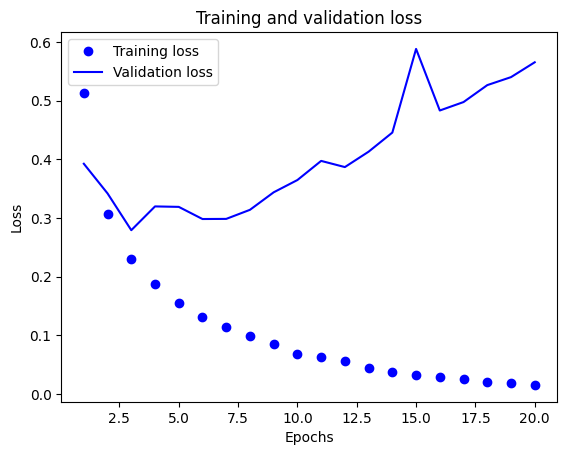

In [14]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

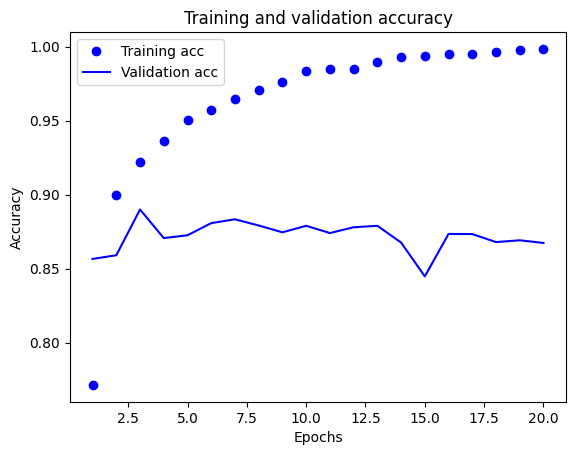

In [15]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [14]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

2023-12-31 22:01:43.531034: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-31 22:01:43.696149: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-31 22:01:43.696588: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-31 22:01:43.698106: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-31 22:01:43.698435: I external/local_xla/xla/stream_executor

Epoch 1/4


ValueError: in user code:

    File "/home/rakescar/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/home/rakescar/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/rakescar/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/home/rakescar/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/rakescar/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/home/rakescar/.local/lib/python3.11/site-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/rakescar/.local/lib/python3.11/site-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/rakescar/.local/lib/python3.11/site-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/rakescar/.local/lib/python3.11/site-packages/keras/src/losses.py", line 2532, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "/home/rakescar/.local/lib/python3.11/site-packages/keras/src/backend.py", line 5822, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 1) vs (None, 46)).


In [ ]:
results

### Using a trained model to generate predictions on new data

In [ ]:
model.predict(x_test)

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2023-12-31 21:59:38.936054: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-31 21:59:38.936222: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-31 21:59:38.962939: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-31 21:59:39.055187: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-31 21:59:40.797171: W tensorflow/compiler/tf2

In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
print(train_data.shape)
print(train_data[10])

(8982,)
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


**Decoding newswires back to text**

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [6]:
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [7]:
print(train_data[10])
print(train_labels[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]
3


### Preparing the data

**Encoding the input data**

In [10]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [11]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [12]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [15]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [16]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [17]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [18]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


2023-12-31 22:02:20.216861: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 319280000 exceeds 10% of free system memory.
2023-12-31 22:02:20.450059: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 319280000 exceeds 10% of free system memory.
2023-12-31 22:02:21.003054: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 20480000 exceeds 10% of free system memory.
2023-12-31 22:02:21.486465: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-31 22:02:21.623666: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f2b0c6cdd40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-31 22:02:21.623710: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2023-12-31 22:02:21.650501: I tensorflow/compiler/mlir/tensorf

16/16 [==============================] - 2s 40ms/step - loss: 2.8329 - accuracy: 0.4878 - val_loss: 1.9178 - val_accuracy: 0.6230
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.6095 - accuracy: 0.6760 - val_loss: 1.4086 - val_accuracy: 0.6890
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.2142 - accuracy: 0.7414 - val_loss: 1.2209 - val_accuracy: 0.7350
Epoch 4/20
16/16 [==============================] - 0s 14ms/step - loss: 0.9776 - accuracy: 0.7933 - val_loss: 1.0839 - val_accuracy: 0.7570
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8088 - accuracy: 0.8276 - val_loss: 1.0098 - val_accuracy: 0.7800
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6665 - accuracy: 0.8596 - val_loss: 0.9775 - val_accuracy: 0.7950
Epoch 7/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5568 - accuracy: 0.8849 - val_loss: 0.9119 - val_accuracy: 0.8050
Epoch 8/20
16/16 [======

**Plotting the training and validation loss**

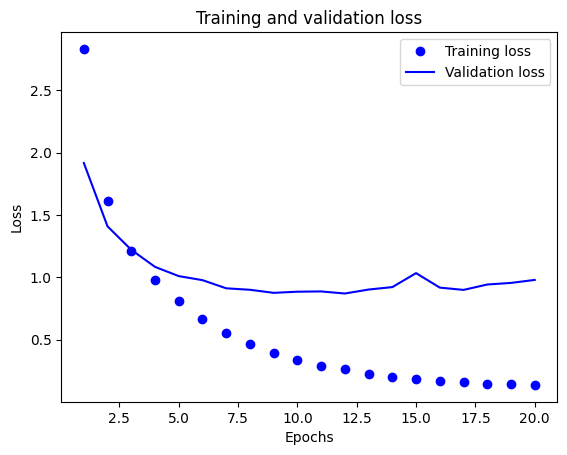

In [20]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

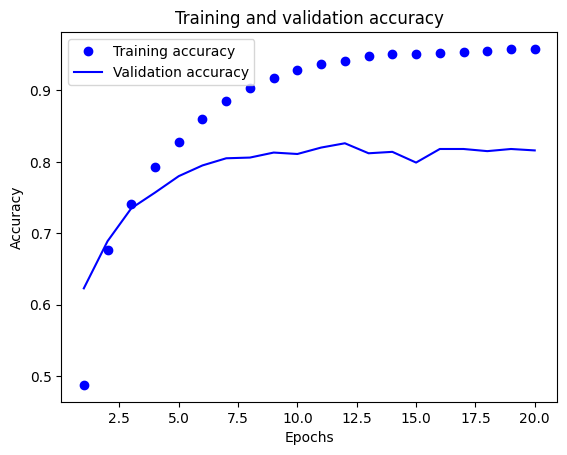

In [21]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [22]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 12ms/step - loss: 2.6936 - accuracy: 0.5163
Epoch 2/9
18/18 [==============================] - 0s 11ms/step - loss: 1.5025 - accuracy: 0.6821
Epoch 3/9
18/18 [==============================] - 0s 11ms/step - loss: 1.1557 - accuracy: 0.7430
Epoch 4/9
18/18 [==============================] - 0s 12ms/step - loss: 0.9382 - accuracy: 0.7977
Epoch 5/9
18/18 [==============================] - 0s 11ms/step - loss: 0.7719 - accuracy: 0.8343
Epoch 6/9
18/18 [==============================] - 0s 13ms/step - loss: 0.6332 - accuracy: 0.8707
Epoch 7/9
18/18 [==============================] - 0s 13ms/step - loss: 0.5243 - accuracy: 0.8910
Epoch 8/9
18/18 [==============================] - 0s 12ms/step - loss: 0.4419 - accuracy: 0.9057
Epoch 9/9
71/71 [==============================] - 0s 4ms/step - loss: 0.9143 - accuracy: 0.7916


In [23]:
results

[0.9143149852752686, 0.7916295528411865]

In [24]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.20213713268032057

### Generating predictions on new data

In [25]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 4ms/step


In [26]:
predictions[0].shape

(46,)

In [27]:
np.sum(predictions[0])

0.99999994

In [28]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

In [29]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [30]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [48]:
model = keras.Sequential([
    # layers.Dense(256, activation="relu"),
    # layers.Dense(128, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=10,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/10
63/63 [==============================] - 1s 11ms/step - loss: 1.8052 - accuracy: 0.6411 - val_loss: 1.1644 - val_accuracy: 0.7370
Epoch 2/10
63/63 [==============================] - 0s 8ms/step - loss: 0.9192 - accuracy: 0.7992 - val_loss: 0.9748 - val_accuracy: 0.7850
Epoch 3/10
63/63 [==============================] - 1s 9ms/step - loss: 0.6069 - accuracy: 0.8736 - val_loss: 0.8775 - val_accuracy: 0.8070
Epoch 4/10
63/63 [==============================] - 1s 10ms/step - loss: 0.4206 - accuracy: 0.9132 - val_loss: 0.8551 - val_accuracy: 0.8140
Epoch 5/10
63/63 [==============================] - 1s 9ms/step - loss: 0.3081 - accuracy: 0.9332 - val_loss: 0.8709 - val_accuracy: 0.8170
Epoch 6/10
63/63 [==============================] - 1s 9ms/step - loss: 0.2431 - accuracy: 0.9448 - val_loss: 0.8802 - val_accuracy: 0.8180
Epoch 7/10
63/63 [==============================] - 1s 9ms/step - loss: 0.2044 - accuracy: 0.9489 - val_loss: 0.9233 - val_accuracy: 0.8120
Epoch 8/10
63/63 [

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [34]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 2us/step


In [35]:
train_data.shape

(404, 13)

In [36]:
test_data.shape

(102, 13)

In [37]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [38]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [39]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

In [ ]:
all_scores

In [ ]:
np.mean(all_scores)

**Saving the validation logs at each fold**

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

**Building the history of successive mean K-fold validation scores**

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

In [ ]:
test_mae_score

### Generating predictions on new data

In [ ]:
predictions = model.predict(test_data)
predictions[0]

### Wrapping up

## Summary